## EXPERIMENT 2.1: AdaFace

In [1]:
## Load libraries

import numpy as np
import cv2
from matplotlib import pyplot as plt
import torch
import seaborn as sns
import pandas as pd
from sklearn.preprocessing import normalize
import sys
sns.set(style="white")
%matplotlib inline
sys.path.append('../../utils')
from Model_utils.Model_funcs import *
from Result_metric_utils.result_metrics import *
from Data_proc_utils.Data_proc_funcs import *
from Plotting_stats_utils.plotting_threshold import *
from Plotting_stats_utils.stats_tables import *


from IPython import embed


In [ ]:
# Save figures
from matplotlib import pyplot as plt
save_fig_path = '../../figures/ada_2_1/'

### AdaFace Results

This notebook loads the feature vectors from MagFace and run them through the results metrics:
FNIR, FPIR, FND, FPD, and GARBE

In [2]:
feature_list_children = '../../data/data_full/feature_vectors/adaface_feature_vectors/2.1/similarity_scores_children_filtered_bibel_FINAL_INFERENCE_finetuning_frozen_9_layers_2_1.pt'
feature_list_adults = '../../data/data_full/feature_vectors/adaface_feature_vectors/2.1/similarity_scores_adults_finetuning_frozen_9_layers_2_1.pt'


image_names_c, ids_c, num_ids_c, norm_feats_c = load_adaface_vectors(feature_list_children)
image_names_a, ids_a, num_ids_a, norm_feats_a = load_adaface_vectors(feature_list_adults)
# image_names_a, ids_a, num_ids_a, norm_feats_a = load_adaface_vectors_adults(feature_list_adults) # virker for den gamle, men ikke de cropped af en eller anden grund

ids_a = ["_".join(x.split("_")[1:]) for x in ids_a]


# Similarity matrices from adaface - all
sim_mat_c = np.dot(norm_feats_c, norm_feats_c.T)
sim_mat_a = np.dot(norm_feats_a, norm_feats_a.T)


# Dataframes with info, removes names not in magface results
children_all = pd.read_csv('../../data/image_info_csvs/final_filtered_children_df_BIBEL.csv')
children_all = children_all[children_all.image_name.isin(image_names_c)]

adults_all_org = pd.read_csv('../../data/image_info_csvs/final_filtered_adults_df_BIBEL.csv')
adults_all = adults_all_org[adults_all_org.image_name.isin(image_names_a)]

# Finding the right threshold

In [7]:
random_states = [1,2]
percentiles = np.arange(0.0, 1.0, 0.02).tolist()

df_all_threshold_x = compute_metrics_ex_1_1(random_states, percentiles, children_all, adults_all, image_names_c, image_names_a, sim_mat_c, sim_mat_a, num_ids_c, num_ids_a, ids_c, ids_a, balance_child_data, balance_adults_data_enrolled, compute_fnir, compute_fpir, GARBE)


sim_mat_c shape: (7571, 7571)
indices_c_all_reference: [10, 17, 35, 49, 59, 66, 95, 101, 106, 133, 146, 151, 154, 203, 204, 207, 219, 224, 239, 246, 248, 253, 286, 320, 326, 331, 332, 340, 342, 347, 364, 365, 366, 367, 368, 428, 453, 457, 492, 534, 540, 556, 570, 591, 618, 624, 643, 661, 671, 672, 702, 709, 713, 714, 715, 719, 732, 737, 771, 777, 783, 784, 789, 790, 791, 792, 793, 795, 798, 799, 801, 814, 815, 818, 821, 850, 858, 874, 875, 882, 883, 884, 900, 906, 936, 955, 966, 988, 1004, 1016, 1022, 1039, 1053, 1054, 1061, 1124, 1128, 1143, 1144, 1145, 1152, 1172, 1192, 1207, 1218, 1228, 1247, 1248, 1249, 1266, 1274, 1275, 1280, 1281, 1337, 1343, 1345, 1350, 1385, 1386, 1400, 1409, 1415, 1422, 1427, 1461, 1480, 1494, 1495, 1499, 1503, 1524, 1525, 1533, 1555, 1558, 1559, 1560, 1566, 1567, 1611, 1612, 1613, 1625, 1634, 1635, 1637, 1755, 1769, 1770, 1815, 1872, 1873, 1874, 1875, 1904, 1925, 1967, 2004, 2019, 2064, 2069, 2071, 2072, 2085, 2096, 2098, 2099, 2117, 2130, 2131, 2132, 2169, 2

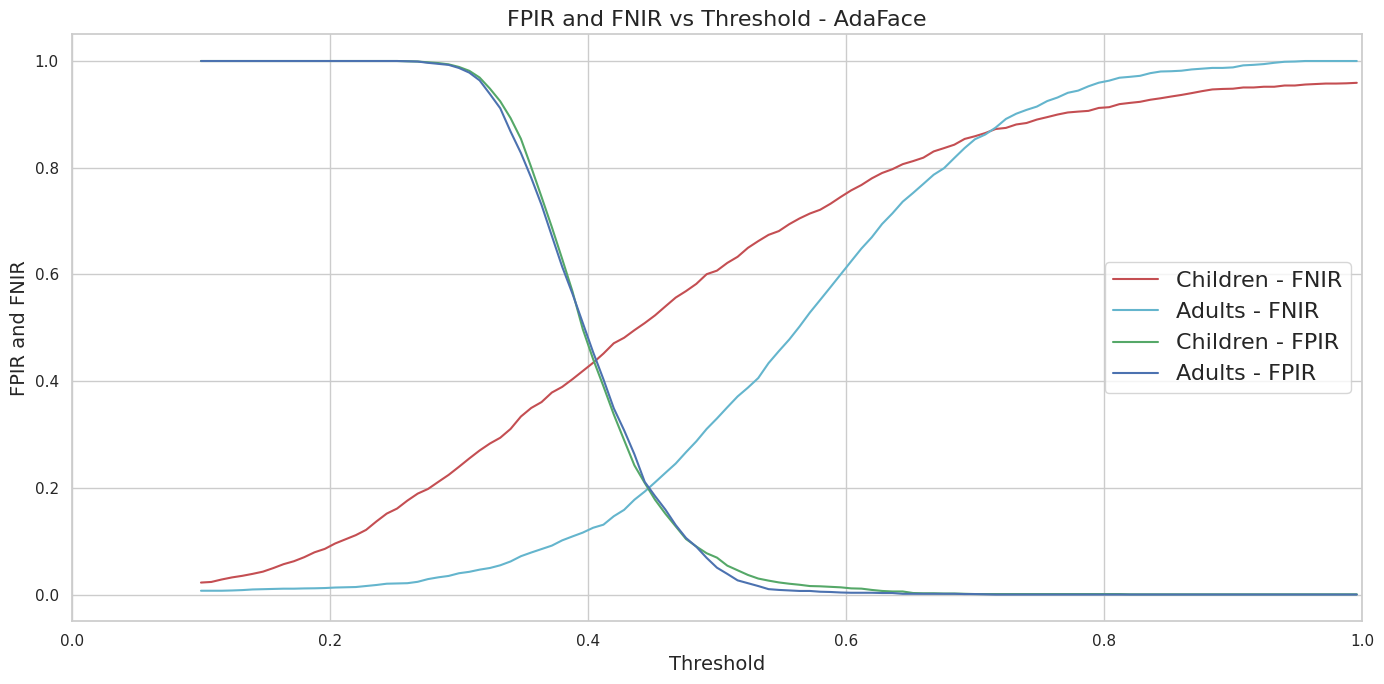

In [8]:

plot_threshold_metrics_ex_1_1_together_w_conf(df_all_threshold_x, 'AdaFace ex. 2.1', save_fig_path)

# then the threshold should be based on the childrens and that would be 0.163

# Stats

In [12]:

random_states = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

df_all_results, sim_mat_dict_all_magface_ex1_1 = evaluate_metrics_ex_1_1(
    random_states, children_all, adults_all, image_names_c, image_names_a,
    sim_mat_c, sim_mat_a, num_ids_c, num_ids_a, ids_c, ids_a, balance_child_data,
    balance_adults_data_enrolled, compute_fnir, compute_fpir, GARBE, remove_ones, df_all_threshold_x[df_all_threshold_x.FNIR_c <0.05].Threshold.max()
)


FPD result:  0.0
FND result:  0.30344947492871555
GARBE result, GARBE close to 1 means more unfair:  0.22758710619653666
done
FPD result:  0.0
FND result:  0.3319823328511389
GARBE result, GARBE close to 1 means more unfair:  0.24898674963835415
done
FPD result:  0.0
FND result:  0.3309874042103409
GARBE result, GARBE close to 1 means more unfair:  0.24824055315775567
done
FPD result:  0.0
FND result:  0.292962339976457
GARBE result, GARBE close to 1 means more unfair:  0.21972175498234275
done
FPD result:  0.0
FND result:  0.40169299353209476
GARBE result, GARBE close to 1 means more unfair:  0.30126974514907107
done
FPD result:  0.0
FND result:  0.2699473386064662
GARBE result, GARBE close to 1 means more unfair:  0.20246050395484966
done
FPD result:  0.0
FND result:  0.33642541440203594
GARBE result, GARBE close to 1 means more unfair:  0.25231906080152694
done
FPD result:  0.0
FND result:  0.40751298351014886
GARBE result, GARBE close to 1 means more unfair:  0.3056347376326116
don

/tmp/ipykernel_41041/232396203.py:9: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df_all_results.describe().applymap(lambda x: f"{x:.3f}")


,Iteration,FNIR_c,FNIR_a,FPIR_c,FPIR_a,FPD,FND,GARBE,Threshold
count,10.000,10.000,10.000,10.000,10.000,10.000,10.000,10.000,10.000
mean,5.500,0.052,0.010,1.000,1.000,0.000,0.340,0.255,0.155
std,3.028,0.006,0.004,0.000,0.000,0.000,0.047,0.035,0.000
min,1.000,0.042,0.005,1.000,1.000,0.000,0.270,0.202,0.155
25%,3.250,0.050,0.007,1.000,1.000,0.000,0.310,0.233,0.155
50%,5.500,0.053,0.010,1.000,1.000,0.000,0.333,0.250,0.155
75%,7.750,0.056,0.012,1.000,1.000,0.000,0.378,0.284,0.155
max,10.000,0.059,0.016,1.000,1.000,0.000,0.408,0.306,0.155


In [ ]:
# Generate the LaTeX table
latex_table = generate_latex_table(df_all_results.applymap(lambda x: f"{x:.3f}").drop(columns='Iteration'))
print(latex_table)

In [ ]:
latex_table = generate_latex_table(df_all_results.describe().applymap(lambda x: f"{x:.3f}").drop(columns='Iteration'))
print(latex_table)

\begin{table}
\caption{Descriptive Statistics} 
\label{table:descriptive_stats} 
\begin{tabular}{lcccccccc} 
\toprule
\textbf{{Iteration}} & $FNIR_c$ & $FNIR_a$ & $FPIR_c$ & $FPIR_a$ & $FPD$ & $FND$ & $GARBE$ & $T$ \\
\midrule
\textbf{0} & 0.044 & 0.011 & 1.000 & 1.000 & 0.000 & 0.300 & 0.225 & 0.190 \\
\textbf{1} & 0.058 & 0.018 & 1.000 & 1.000 & 0.000 & 0.264 & 0.198 & 0.190 \\
\textbf{2} & 0.047 & 0.009 & 1.000 & 1.000 & 0.000 & 0.339 & 0.254 & 0.190 \\
\textbf{3} & 0.049 & 0.015 & 1.000 & 1.000 & 0.000 & 0.268 & 0.201 & 0.190 \\
\textbf{4} & 0.050 & 0.016 & 1.000 & 1.000 & 0.000 & 0.260 & 0.195 & 0.190 \\
\textbf{5} & 0.053 & 0.015 & 1.000 & 1.000 & 0.000 & 0.275 & 0.206 & 0.190 \\
\textbf{6} & 0.048 & 0.012 & 1.000 & 1.000 & 0.000 & 0.299 & 0.225 & 0.190 \\
\textbf{7} & 0.063 & 0.008 & 1.000 & 1.000 & 0.000 & 0.392 & 0.294 & 0.190 \\
\textbf{8} & 0.052 & 0.011 & 1.000 & 1.000 & 0.000 & 0.323 & 0.242 & 0.190 \\
\textbf{9} & 0.059 & 0.006 & 1.000 & 1.000 & 0.000 & 0.407 & 0.305 & 0.

/tmp/ipykernel_2128/1391386501.py:2: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  latex_table = generate_latex_table(df_all_results.applymap(lambda x: f"{x:.3f}").drop(columns='Iteration'))
/tmp/ipykernel_2128/1391386501.py:5: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  latex_table = generate_latex_table(df_all_results.describe().applymap(lambda x: f"{x:.3f}").drop(columns='Iteration'))


In [ ]:
df_all_results.to_csv('df_all_results_ada_2_1.csv', index=False)


# Stats

In [ ]:
import scipy.stats as stats

t_statistic, p_value = stats.ttest_rel(df_all_results['FNIR_c'], df_all_results['FNIR_a'])

# Output the results
print(f'T-statistic: {t_statistic}')
print(f'P-value: {p_value}')

# Gemmer simscores

In [14]:

sim_mat_c_enrolled_iterations = []

# Loop to access each array and append it to the list
for i in range(1, 11):
    key = f'sim_mat_c_enrolled_iteration_{i}'
    if key in sim_mat_dict_all_magface_ex1_1:
        sim_mat_c_enrolled_iterations.append(sim_mat_dict_all_magface_ex1_1[key])

# Concatenate all arrays into one big array
sim_mat_c_enrolled_iterations_all = np.concatenate(sim_mat_c_enrolled_iterations)
sim_mat_c_enrolled_iterations_all = pd.DataFrame(sim_mat_c_enrolled_iterations_all)
sim_mat_c_enrolled_iterations_all.to_csv('sim_mat_c_enrolled_iterations_all_ada_2_1.csv', index=False)
# Print the big array
print(len(sim_mat_c_enrolled_iterations_all))

sim_mat_a_enrolled_iterations = []

# Loop to access each array and append it to the list
for i in range(1, 11):
    key = f'sim_mat_a_enrolled_iteration_{i}'
    if key in sim_mat_dict_all_magface_ex1_1:
        sim_mat_a_enrolled_iterations.append(sim_mat_dict_all_magface_ex1_1[key])

# Concatenate all arrays into one big array
sim_mat_a_enrolled_iterations_all = np.concatenate(sim_mat_a_enrolled_iterations)
sim_mat_a_enrolled_iterations_all = pd.DataFrame(sim_mat_a_enrolled_iterations_all)
sim_mat_a_enrolled_iterations_all.to_csv('sim_mat_a_enrolled_iterations_all_ada_2_1.csv', index=False)


# Print the big array
print(len(sim_mat_a_enrolled_iterations_all))


121256
41438


In [15]:

sim_mat_c_non_enrolled_iterations = []

# Loop to access each array and append it to the list
for i in range(1, 11):
    key = f'sim_mat_c_non_enrolled_iteration_{i}'
    if key in sim_mat_dict_all_magface_ex1_1:
        sim_mat_c_non_enrolled_iterations.append(sim_mat_dict_all_magface_ex1_1[key])

sim_mat_c_non_enrolled_iterations_all = np.concatenate(sim_mat_c_non_enrolled_iterations)
sim_mat_c_non_enrolled_iterations_all = pd.DataFrame(sim_mat_c_non_enrolled_iterations_all)
sim_mat_c_non_enrolled_iterations_all.to_csv('sim_mat_c_non_enrolled_iterations_all_ada_2_1.csv', index=False)
# Print the big array
print(len(sim_mat_c_non_enrolled_iterations_all))


sim_mat_a_non_enrolled_iterations = []

# Loop to access each array and append it to the list
for i in range(1, 11):
    key = f'sim_mat_a_non_enrolled_iteration_{i}'
    if key in sim_mat_dict_all_magface_ex1_1:
        sim_mat_a_non_enrolled_iterations.append(sim_mat_dict_all_magface_ex1_1[key])

sim_mat_a_non_enrolled_iterations_all = np.concatenate(sim_mat_a_non_enrolled_iterations)
sim_mat_a_non_enrolled_iterations_all = pd.DataFrame(sim_mat_a_non_enrolled_iterations_all)
sim_mat_a_non_enrolled_iterations_all.to_csv('sim_mat_a_non_enrolled_iterations_all_ada_2_1.csv', index=False)

# Print the big array
print(len(sim_mat_a_non_enrolled_iterations_all))


32751054
32371232


# loader sim scores

In [2]:
sim_mat_c_enrolled_iterations_all_ada = (pd.read_csv('sim_mat_c_enrolled_iterations_all_ada_2_1.csv')).values.flatten()
sim_mat_a_enrolled_iterations_all_ada = (pd.read_csv('sim_mat_a_enrolled_iterations_all_ada_2_1.csv')).values.flatten()
sim_mat_c_non_enrolled_iterations_all_ada = (pd.read_csv('sim_mat_c_non_enrolled_iterations_all_ada_2_1.csv')).values.flatten()
sim_mat_a_non_enrolled_iterations_all_ada = (pd.read_csv('sim_mat_a_non_enrolled_iterations_all_ada_2_1.csv')).values.flatten()


In [3]:
from scipy.stats import describe, gaussian_kde
import math

def descriptive_statistics(mated_scores, nonmated_scores):
    stats_labels = ["Observations", "Minimum", "Maximum", "Mean", "St. Dev.", "Skewness", "Ex. Kurtosis"]
    mated_stats = describe(mated_scores)
    mated_stats = [mated_stats.nobs, mated_stats.minmax[0], mated_stats.minmax[1], mated_stats.mean, math.sqrt(mated_stats.variance), mated_stats.skewness, mated_stats.kurtosis]
    nonmated_stats = describe(nonmated_scores)
    nonmated_stats = [nonmated_stats.nobs, nonmated_stats.minmax[0], nonmated_stats.minmax[1], nonmated_stats.mean, math.sqrt(nonmated_stats.variance), nonmated_stats.skewness, nonmated_stats.kurtosis]

    stats_system_df = pd.DataFrame(np.array([stats_labels, mated_stats, nonmated_stats]).T, columns=["Statistic", "Mated", "Non-mated"])
    stats_system_df = stats_system_df.astype({"Statistic": str, "Mated": float, "Non-mated": float})
    return stats_system_df

In [4]:
mated_scores1 = sim_mat_a_enrolled_iterations_all_ada
nonmated_scores1 = sim_mat_a_non_enrolled_iterations_all_ada
scores_type1 = "similarity"
stats_system1_df = descriptive_statistics(mated_scores1, nonmated_scores1)
display(stats_system1_df)

,Statistic,Mated,Non-mated
0,Observations,41438.000000,3.237123e+07
1,Minimum,-0.096831,-3.719352e-01
2,Maximum,0.964713,7.792372e-01
3,Mean,0.592209,6.348244e-02
4,St. Dev.,0.139787,8.615287e-02
5,Skewness,-0.428331,2.887364e-01
6,Ex. Kurtosis,1.028674,3.991577e-01


In [5]:
mated_scores2 = sim_mat_c_enrolled_iterations_all_ada
nonmated_scores2 = sim_mat_c_non_enrolled_iterations_all_ada
scores_type2 = "similarity"
stats_system2_df = descriptive_statistics(mated_scores2, nonmated_scores2)
display(stats_system2_df)

,Statistic,Mated,Non-mated
0,Observations,121256.000000,3.275105e+07
1,Minimum,-0.109752,-4.038379e-01
2,Maximum,0.998893,9.999233e-01
3,Mean,0.470476,3.848615e-02
4,St. Dev.,0.185919,9.476939e-02
5,Skewness,0.100369,2.218583e-01
6,Ex. Kurtosis,-0.331034,1.641183e-01


In [6]:
mated_colour = "green"
mated_label = "Mated scores"
nonmated_colour = "red"
nonmated_label = "Non-mated scores"

figure_size = (12,6)
alpha_shade = 0.25
alpha_fill = 1.0
linewidth = 2
legend_loc = "upper left"
legend_anchor = (1.0, 1.02)
legend_cols = 1
legend_fontsize = 12
label_fontsize = 16

threshold_colour = "black"
threshold_style = "--"
round_digits = 5
sns.set(style="white", palette="muted", color_codes=True)
plt.rc("axes", axisbelow=True)

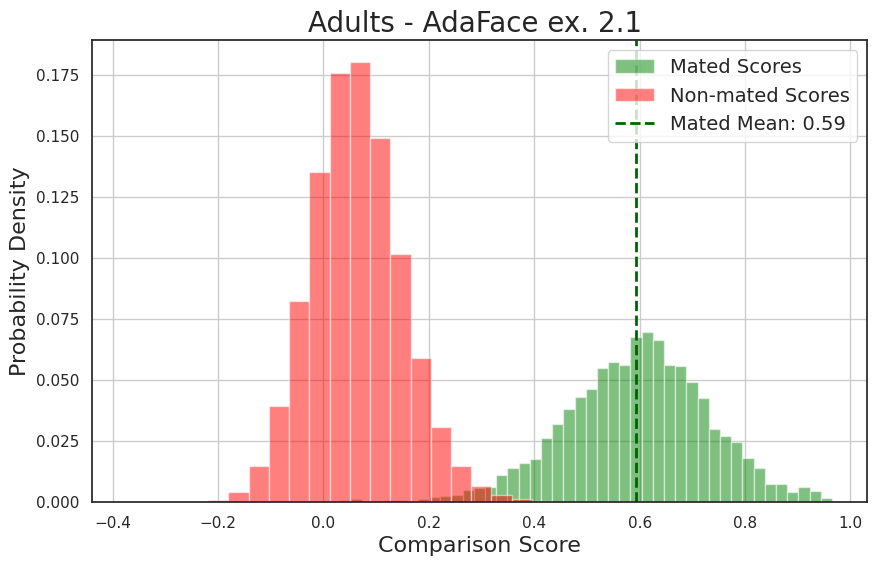

In [8]:
from DET_utils.DET_plots import *
plot_histogram(mated_scores1, nonmated_scores1, normalise=True, title = 'Adults - MagFace ex. 2.1 ', save_fig_path=save_fig_path, gem_som = 'A1')


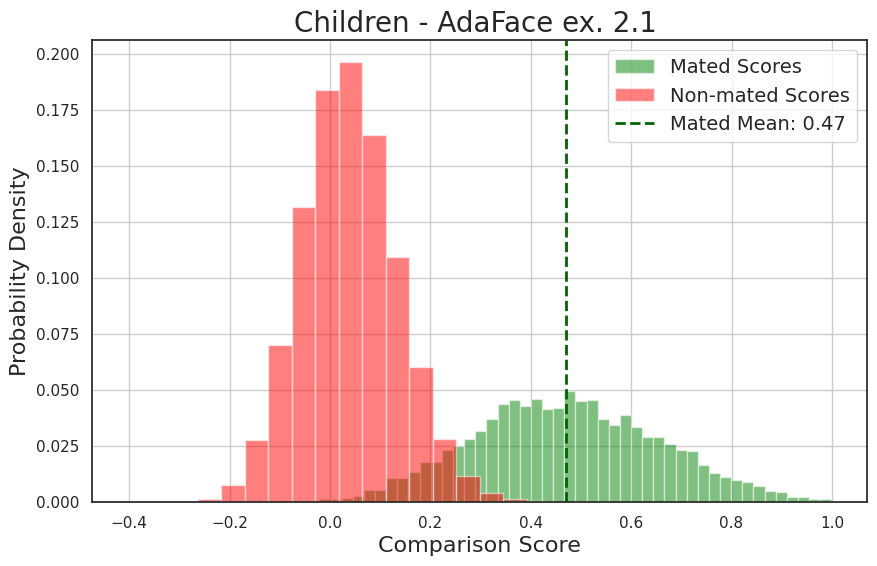

In [9]:
plot_histogram(mated_scores2, nonmated_scores2, normalise=True, title = 'Children - AdaFace ex. 2.1 ',save_fig_path=save_fig_path, gem_som = 'C1')


# DET curves


In [10]:
# from DET_utils.DET_plots import *

In [12]:
d_prime_system1 = d_prime(mated_scores1, nonmated_scores1)
print("d' child =", round(d_prime_system1, round_digits))

d_prime_system2 = d_prime(mated_scores2, nonmated_scores2)
print("d' adult =", round(d_prime_system2, round_digits))


d' child = 4.55373
d' adult = 2.92759


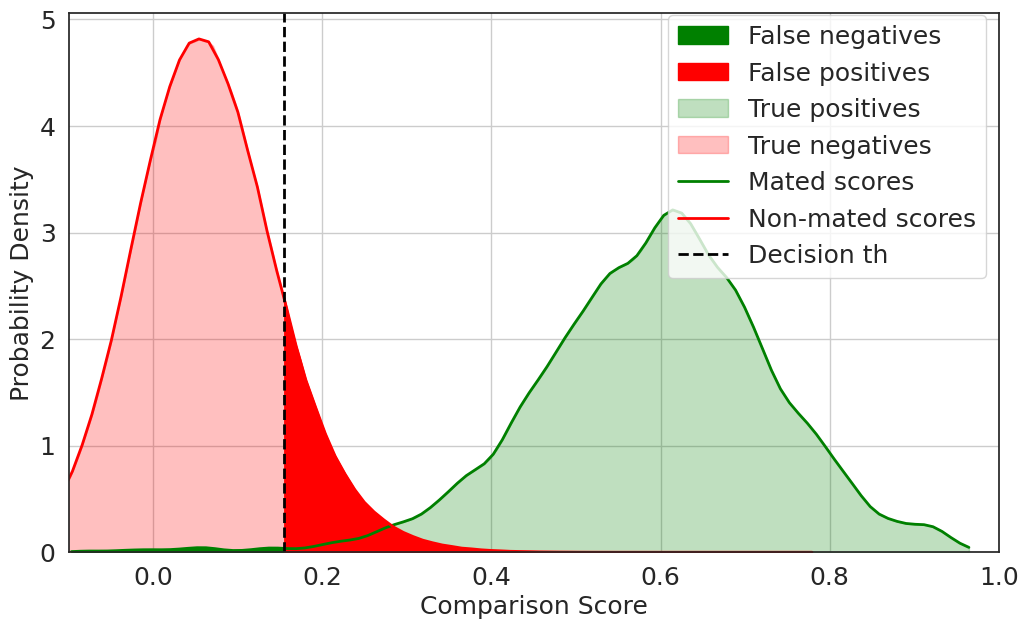

In [13]:
threshold1 = df_all_threshold_x[df_all_threshold_x.FNIR_c <0.05].Threshold.max()
kde_with_threshold(mated_scores1, nonmated_scores1, scores_type1, threshold1, save_fig_path=save_fig_path, title='A2')

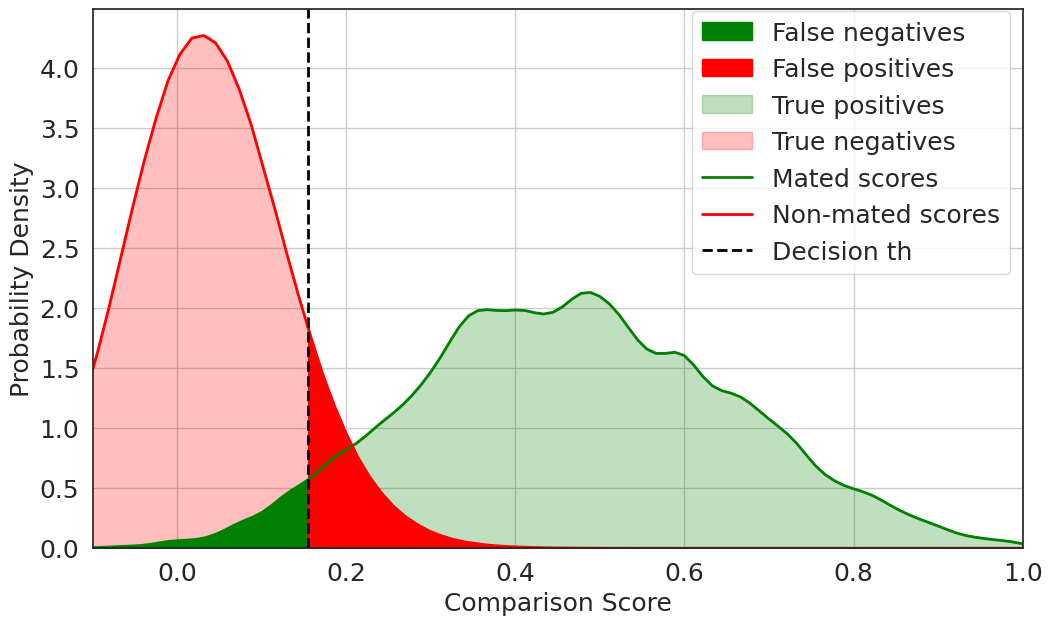

In [14]:
threshold2 = df_all_threshold_x[df_all_threshold_x.FNIR_c <0.05].Threshold.max()
kde_with_threshold(mated_scores2, nonmated_scores2, scores_type2, threshold2, save_fig_path=save_fig_path, title='C2')

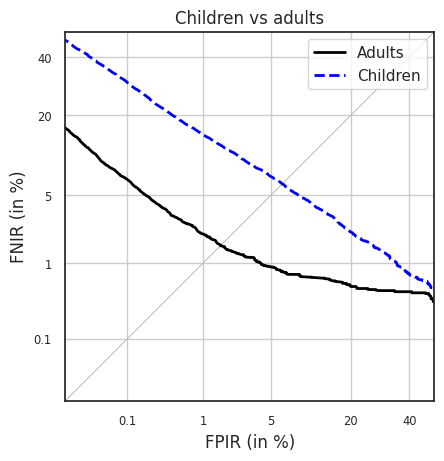

In [15]:


# def DET_plotting_1_1(mated_scores1, mated_scores2,nonmated_scores1, nonmated_scores2, score_type= "similarity",title = 'Adults vs Children - MagFace ex. 2.2', save_fig_path= 'save_fig_path'):
#     figure_size = (12,7)
#     alpha_shade = 0.25
#     alpha_fill = 1.0
#     linewidth = 2
#     legend_loc = "upper left"
#     legend_anchor = (1.0, 1.02)
#     legend_cols = 1
#     legend_fontsize = 18
#     label_fontsize = 18
#     tick_fontsize = 18
#     system_name1 = 'Adults'
#     system_name2 = 'Children'

#     det = DET(biometric_evaluation_type='identification', abbreviate_axes=True, plot_eer_line=True, plot_title=title)
#     det.x_limits = np.array([1e-5, .8])
#     det.y_limits = np.array([1e-5, .8])
#     det.x_ticks = np.array([1e-4, 1e-3, 1e-2, 5e-2, 20e-2, 40e-2, 80e-2])
#     det.x_ticklabels = np.array(['0.01','0.1', '1', '5', '20', '40', '80'])
#     det.y_ticks = np.array([1e-4, 1e-3, 1e-2, 5e-2, 20e-2, 40e-2, 80e-2])
#     det.y_ticklabels = np.array(['0.01','0.1', '1', '5', '20', '40', '80'])
#     det.create_figure()
#     det.plot(tar=adjust_scores_for_DET(mated_scores1, scores_type1), non=adjust_scores_for_DET(nonmated_scores1, scores_type1), label=system_name1)
#     det.plot(tar=adjust_scores_for_DET(mated_scores2, scores_type2), non=adjust_scores_for_DET(nonmated_scores2, scores_type2), label=system_name2)
#     det.legend_on(loc="upper right")
#     det.show()

DET_plotting_1_1(mated_scores1, mated_scores2,nonmated_scores1, nonmated_scores2, "similarity",'Adults vs Children - MagFace ex. 2.1', save_fig_path)
